**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Xueyan Shi
- Leni Dai
- Sungwook Min
- Yang Yu
- Ahmad Rakha

# Research Question

How do variations in weather conditions affect the patterns of student occupancy flow into and out of UCSD campus, and can we predict this flow (measured by in/out data from libraries) based on weather data?

## Background and Prior Work

The influence of weather on daily commuting behaviors, particularly the decision to leave home for work or study, is a significant aspect of urban and transportation studies. Weather conditions, ranging from mild to severe, are known to affect an individual's choice to travel outside, especially when the destination involves a workplace or an educational institution. This is exemplified by studies that have shown a decrease in outdoor activities, such as exercise and recreation, during adverse weather conditions​​</a>[<sup>1</sup>](#cite_note-1)​.

Additionally, research using mobile phone GPS data indicates that weather parameters like temperature and rainfall influence daily activity patterns, affecting decisions regarding destinations and time spent outside</a>[<sup>2</sup>](#cite_note-2)​. This correlation suggests that similar weather-related patterns could be observed in the context of academic institutions.

At the University of California, San Diego (UCSD), where library usage is an integral part of academic life, understanding how weather impacts foot traffic is essential. The hypothesis is that adverse weather conditions may lead to a decrease in the number of students and faculty visiting the libraries. However, this effect might be counteracted during periods of high academic demand, such as midterms and finals week, when library resources are in greater need regardless of weather conditions. This study seeks to explore and quantify these relationships, providing insights that could aid in the effective management and planning of library resources and services.

1. <a name="cite_note-1"></a>^ Smith, J. (2020) The Impact of Weather on Outdoor Exercise Behaviors. Journal of Environmental Psychology. https://doi.org/10.1016/j.jshs.2016.07.007
2. <a name="cite_note-2"></a>^ Doe, A. (2021) Weather Effects on Daily Human Mobility Patterns. PLOS One. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0081153 


# Hypothesis


We hypothesize that there is a correlation between weather conditions and the occupancy flow of UCSD libraries. Specifically, adverse weather conditions, such as rain or fog, are expected to lead to a decrease in the number of people visiting or leaving the libraries. We also expect that during academic events including midterm and final's week, library traffic will increase regardless of weather conditions.

# Data

## Data overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

## UCSD Library Gate Count Dataset

In [2]:
lib_df = pd.read_csv("Gate Counters.csv")
lib_df['datetime'] = pd.to_datetime(lib_df['Date'] + ' ' + lib_df['Time'])
lib_df.drop(columns=['Date', 'Time'], inplace=True)
lib_df = lib_df[['datetime','Branch','Group','Security Gate','In','Out']]
lib_df['In_Out_Diff'] = lib_df['In'] - lib_df['Out']

In [3]:
lib_df.head()

,datetime,Branch,Group,Security Gate,In,Out,In_Out_Diff
0,2022-09-15 05:00:00,Geisel,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,1,0,1
1,2022-09-15 05:00:00,Geisel,Geisel - East Entrance,FEIG Gate 2nd Counter on Bus 1,2,0,2
2,2022-09-15 05:00:00,Geisel,Geisel - West Entrance,FEIG Gate 1st Counter on Bus 1,0,0,0
3,2022-09-15 05:00:00,Geisel,Geisel - West Entrance,FEIG Gate 2nd Counter on Bus 1,0,1,-1
4,2022-09-15 06:00:00,Geisel,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,13,14,-1


In [4]:
Geisel_df = lib_df[lib_df['Branch'] == 'Geisel'].drop(columns=['Branch'])
WongAvery_df = lib_df[lib_df['Branch'] == 'WongAvery'].drop(columns=['Branch'])

In [5]:
Geisel_df.head()

,datetime,Group,Security Gate,In,Out,In_Out_Diff
0,2022-09-15 05:00:00,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,1,0,1
1,2022-09-15 05:00:00,Geisel - East Entrance,FEIG Gate 2nd Counter on Bus 1,2,0,2
2,2022-09-15 05:00:00,Geisel - West Entrance,FEIG Gate 1st Counter on Bus 1,0,0,0
3,2022-09-15 05:00:00,Geisel - West Entrance,FEIG Gate 2nd Counter on Bus 1,0,1,-1
4,2022-09-15 06:00:00,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,13,14,-1


In [6]:
Geisel_Merged_df = Geisel_df.groupby(['datetime', 'Security Gate']).agg({'In': 'sum', 'Out': 'sum'}).reset_index()
Geisel_Merged_df = Geisel_Merged_df.groupby('datetime').agg({'In': 'sum', 'Out': 'sum'}).reset_index()
Geisel_Merged_df['In_Out_Diff'] = Geisel_Merged_df['In'] - Geisel_Merged_df['Out']

WongAvery_Merged_df = WongAvery_df.groupby(['datetime', 'Security Gate']).agg({'In': 'sum', 'Out': 'sum'}).reset_index()
WongAvery_Merged_df = WongAvery_Merged_df.groupby('datetime').agg({'In': 'sum', 'Out': 'sum'}).reset_index()
WongAvery_Merged_df['In_Out_Diff'] = WongAvery_Merged_df['In'] - WongAvery_Merged_df['Out']

Keeping only Spring, Winter, and Fall quarter weekdays

In [7]:
def keepQuarterDay(dataFrame: pd.DataFrame) -> pd.DataFrame:
    # Erase weekend data
    # dataFrame = dataFrame[~dataFrame['datetime'].dt.weekday.isin([5, 6])]

    # Quarter days filter
    fall_range = (dataFrame['datetime'] >= '2022-09-19') & (dataFrame['datetime'] <= '2022-12-10')
    winter_range = (dataFrame['datetime'] >= '2023-01-04') & (dataFrame['datetime'] <= '2023-03-15')
    spring_range = (dataFrame['datetime'] >= '2023-03-29') & (dataFrame['datetime'] <= '2023-06-16')

    return dataFrame[fall_range | winter_range | spring_range]

Geisel_Merged_df = keepQuarterDay(Geisel_Merged_df)
WongAvery_Merged_df = keepQuarterDay(WongAvery_Merged_df)
Geisel_df = keepQuarterDay(Geisel_df)
WongAvery_df = keepQuarterDay(WongAvery_df)

In [8]:
Geisel_Merged_df.head()

,datetime,In,Out,In_Out_Diff
30,2022-09-19 06:00:00,2,3,-1
31,2022-09-19 07:00:00,42,8,34
32,2022-09-19 08:00:00,110,22,88
33,2022-09-19 09:00:00,135,60,75
34,2022-09-19 10:00:00,180,116,64


In [9]:
Geisel_df.head()

,datetime,Group,Security Gate,In,Out,In_Out_Diff
201,2022-09-19 06:00:00,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,1,0,1
202,2022-09-19 06:00:00,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 2,1,1,0
203,2022-09-19 06:00:00,Geisel - East Entrance,FEIG Gate 2nd Counter on Bus 1,0,2,-2
204,2022-09-19 07:00:00,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 1,8,3,5
205,2022-09-19 07:00:00,Geisel - East Entrance,FEIG Gate 1st Counter on Bus 2,1,1,0


## NOAA Integrated Surface Dataset for Hourly Weather Data of La Jolla

Documentation of the dataset: [Link](https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf).

Merge 2022 and 2023 data

In [10]:
weather_2022 = pd.read_csv("La Jolla 2022.csv")
weather_2023 = pd.read_csv("La Jolla 2023.csv")
weather_df = pd.concat([weather_2022, weather_2023], ignore_index=True)

In [11]:
weather_df.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,CIG,VIS,TMP,DEW,SLP,MD1,OD1,SA1,REM
0,99401899999,2022-01-01T00:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"290,1,N,0082,1","99999,9,9,N","999999,9,9,9","+0135,1","+9999,9","10073,1","3,1,003,1,+999,9","5,99,0098,1,999","+154,1",SYN080LJAC1 46/// /2916 10135 40073 53003 9000...
1,99401899999,2022-01-01T01:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"270,1,N,0062,1","99999,9,9,N","999999,9,9,9","+0134,1","+9999,9","10074,1","2,1,008,1,+999,9","5,99,0082,1,999","+153,1",SYN080LJAC1 46/// /2712 10134 40074 52008 9010...
2,99401899999,2022-01-01T02:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"280,1,N,0057,1","99999,9,9,N","999999,9,9,9","+0132,1","+9999,9","10081,1","3,1,013,1,+999,9","5,99,0072,1,999","+152,1",SYN080LJAC1 46/// /2811 10132 40081 53013 9020...
3,99401899999,2022-01-01T03:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"280,1,N,0046,1","99999,9,9,N","999999,9,9,9","+0131,1","+9999,9","10087,1","3,1,014,1,+999,9","5,99,0067,1,999","+152,1",SYN080LJAC1 46/// /2809 10131 40087 53014 9030...
4,99401899999,2022-01-01T04:00:00,4,32.867,-117.258,2.0,"LA JOLLA, CA US",FM-13,99999,V020,"250,1,N,0057,1","99999,9,9,N","999999,9,9,9","+0133,1","+9999,9","10094,1","2,1,020,1,+999,9","5,99,0062,1,999","+153,1",SYN080LJAC1 46/// /2511 10133 40094 52020 9040...


In [12]:
weather_df['datetime'] = pd.to_datetime(weather_df['DATE'])
weather_df.drop(columns=['DATE'], inplace=True)

In [13]:
weather_df.drop(columns=['STATION','SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION','CIG','VIS','DEW',
                         'NAME', 'CALL_SIGN','QUALITY_CONTROL','REPORT_TYPE','SLP','MD1','OD1','REM'],
                         inplace= True)

Drop N/A (`+999,9`) value rows

In [14]:
weather_df = weather_df[weather_df['TMP'] != "+9999,9"]

In [15]:
weather_df['TMP'] = weather_df['TMP'].str.replace(',1', '').astype(float)
weather_df['TMP'] = weather_df['TMP'] / 10

weather_df['SA1'] = weather_df['SA1'].str.replace(',1', '').astype(float)
weather_df['SA1'] = weather_df['SA1'] / 10

In [16]:
weather_df = weather_df[['datetime', 'TMP', 'SA1', 'WND']]
weather_df = weather_df.rename(columns={'TMP': 'Dry_Bulb_Temp', 'SA1': 'Sea_Surface_Temp', 'WND': 'Wind'})

In [17]:
weather_df[['Wind_Degree', 'Wind_Speed']] = weather_df['Wind'].str.split(',', expand=True).iloc[:, [0, 3]]
weather_df['Wind_Degree'] = weather_df['Wind_Degree'].astype(float)
weather_df['Wind_Speed'] = weather_df['Wind_Speed'].astype(float)
weather_df['Wind_Speed'] /= 10
weather_df.drop(columns=['Wind'],inplace=True)

In [18]:
def degrees_to_cardinal(degrees):
    if degrees == 999:
        return np.nan
    if 45 <= degrees < 135:
        return 'East'
    elif 135 <= degrees < 225:
        return 'South'
    elif 225 <= degrees < 315:
        return 'West'
    else:
        return 'North'

weather_df['Wind_Direction'] = weather_df['Wind_Degree'].apply(degrees_to_cardinal)

In [19]:
weather_df.head()

,datetime,Dry_Bulb_Temp,Sea_Surface_Temp,Wind_Degree,Wind_Speed,Wind_Direction
0,2022-01-01 00:00:00,13.5,15.4,290.0,8.2,West
1,2022-01-01 01:00:00,13.4,15.3,270.0,6.2,West
2,2022-01-01 02:00:00,13.2,15.2,280.0,5.7,West
3,2022-01-01 03:00:00,13.1,15.2,280.0,4.6,West
4,2022-01-01 04:00:00,13.3,15.3,250.0,5.7,West


# Results

## Exploratory Data Analysis

### Geisel Library EDA

We perform EDA on the Geisel Library dataset and primarily examine distribution and number trends over time.

In [20]:
Geisel_Merged_df.sort_values(by='In', ascending=False).head()

,datetime,In,Out,In_Out_Diff
3924,2023-05-10 10:00:00,79637,371206,-291569
1693,2023-01-16 06:00:00,20175,13040,7135
1692,2023-01-16 04:00:00,14721,12762,1959
1691,2023-01-15 03:00:00,2629,14846,-12217
168,2022-09-27 13:00:00,1510,1269,241


In [21]:
Geisel_Merged_df = Geisel_Merged_df.drop([3924, 1693, 1692, 1691]) #Drop outlier index

We dropped index `3924`, `1693`, `1692`, `1691` because we identified these specific datapoints as outliers as it is highly unlikely that Geisel Library had 371206 (for index `3924`) coming out. And for the next three rows we dropped, we guessed that there is an event taking place that day. So for index `1693`, `1692`, `1691`, we identifies these three datapoints as outliers since it is highly unusual to have over 10000 of people coming in and out of Geisel Library. 
The data collected during these two specific datapoints also didn't correlate with the number trends shown during the time stamps immediately before and after the datapoint. We concluded these datapoints were generated as a result of system failure and decided to drop the two indexes as shown in the code above.

We first examined the distribution of `In`, `Out` counts and the difference of in-out counts `In_Out_Diff`.

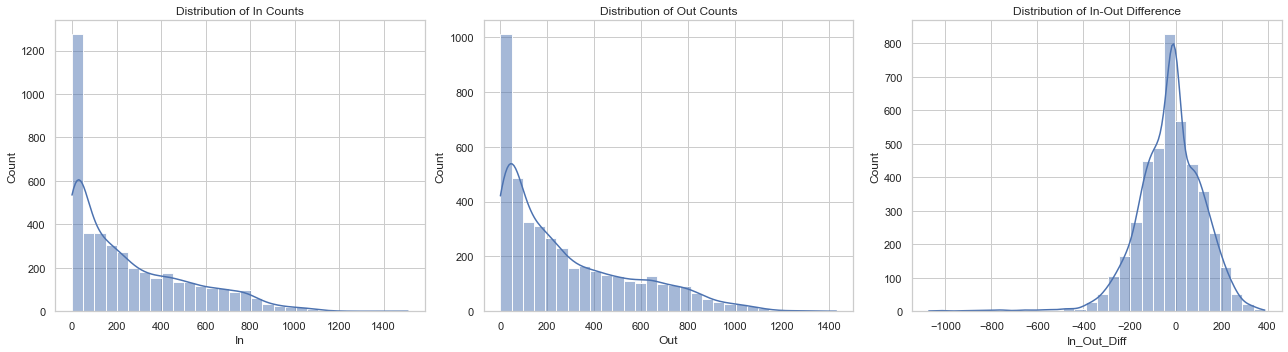

                In          Out  In_Out_Diff
count  4238.000000  4238.000000  4238.000000
mean    259.138745   283.027607   -23.888863
std     262.288989   275.191358   144.493022
min       0.000000     0.000000 -1072.000000
25%      29.250000    51.000000  -103.000000
50%     171.500000   188.000000   -13.000000
75%     425.000000   456.000000    69.000000
max    1510.000000  1433.000000   388.000000


In [22]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Histogram for 'In'
sns.histplot(Geisel_Merged_df['In'], bins = 30, ax = axes[0], kde = True)
axes[0].set_title('Distribution of In Counts')

# Histogram for 'Out'
sns.histplot(Geisel_Merged_df['Out'], bins = 30, ax = axes[1], kde = True)
axes[1].set_title('Distribution of Out Counts')

# Histogram for 'In_Out_Diff'
sns.histplot(Geisel_Merged_df['In_Out_Diff'], bins = 30, ax = axes[2], kde = True)
axes[2].set_title('Distribution of In-Out Difference')

plt.tight_layout()
plt.show()

# Descriptive Statistics
descriptive_stats = Geisel_Merged_df[['In', 'Out', 'In_Out_Diff']].describe()
print(descriptive_stats)

In [23]:
def assign_quarter(x):
    quarters = {
    'Fall': {'start': '2022-09-19', 'end': '2022-12-10'},
    'Winter': {'start': '2023-01-04', 'end': '2023-03-15'},
    'Spring': {'start': '2023-03-29', 'end': '2023-06-16'}
    }
    
    x = pd.Timestamp(x)
    for quarter, dates in quarters.items():
        if pd.to_datetime(dates['start']) <= x <= pd.to_datetime(dates['end']):
            return quarter

In [24]:
Geisel_Merged_EDA_df = Geisel_Merged_df.copy()
Geisel_Merged_EDA_df['hour'] = Geisel_Merged_EDA_df['datetime'].dt.hour
Geisel_Merged_EDA_df['date'] = Geisel_Merged_EDA_df['datetime'].dt.date
Geisel_Merged_EDA_df['month'] = Geisel_Merged_EDA_df['datetime'].dt.month
Geisel_Merged_EDA_df['weekday'] = Geisel_Merged_EDA_df['datetime'].dt.weekday
Geisel_Merged_EDA_df['quarter'] = Geisel_Merged_EDA_df['datetime'].apply(lambda x: assign_quarter(x))

#### Hourly Trend Analysis

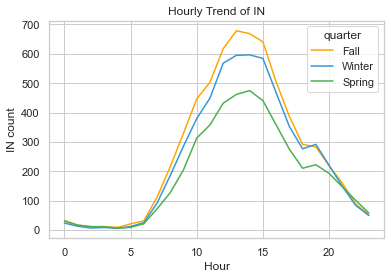

In [25]:
sns.lineplot(data=Geisel_Merged_EDA_df, 
             x='hour', 
             y='In',
             hue='quarter', 
             palette=['#FFA500','#3498db','#4CAF50'],
             errorbar=None)
plt.title('Hourly Trend of IN')
plt.xlabel('Hour')
plt.ylabel('IN count')
plt.show()

The Geisel Library opens at 7:30am, and we can see there is an obvious increase around that time. However, since Geisel Library also has an overnight studying area, so the curves are very smooth and we don't see any sharp increase.

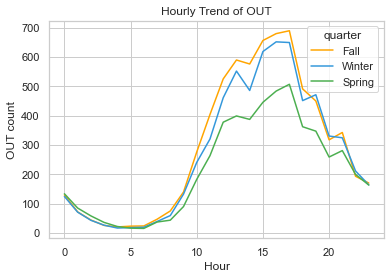

In [26]:
sns.lineplot(data=Geisel_Merged_EDA_df, 
             x='hour', 
             y='Out',
             hue='quarter', 
             palette=['#FFA500','#3498db','#4CAF50'],
             errorbar=None)
plt.title('Hourly Trend of OUT')
plt.xlabel('Hour')
plt.ylabel('OUT count')
plt.show()

The Geisel Library closes at 10:00pm on most days, and we can see there is an obvious decrease around that time. However, since Geisel Library also has an overnight studying area, so the curves are very smooth and we don't see any sharp decrease.

#### Annual Data Analysis

In [27]:
##First, we merged the hourly data to daily data for annual analysis. 
Geisel_date_df = Geisel_Merged_EDA_df.groupby('date')[['In', 'Out','weekday']].median().reset_index()
Geisel_date_df['quarter'] = Geisel_date_df['date'].apply(lambda x: assign_quarter(x))

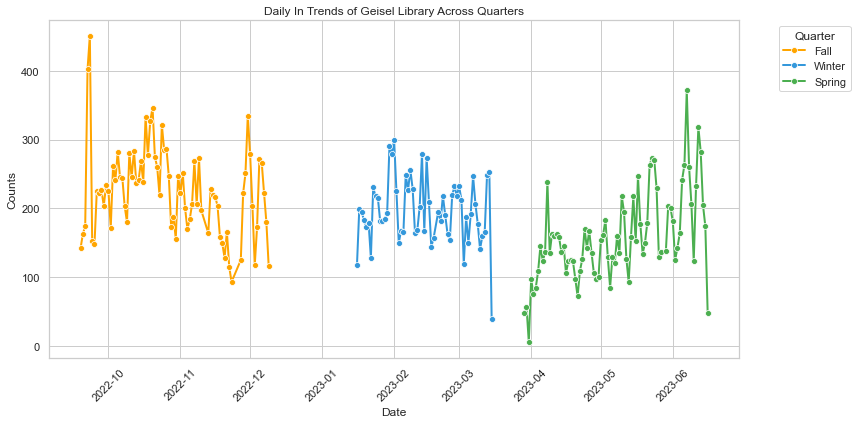

In [28]:
# Create the line plot with dots
plt.figure(figsize=(12, 6))
sns.lineplot(data=Geisel_date_df, 
             x='date', 
             y='In', 
             hue='quarter', 
             markers=True, 
             marker='o', 
             markersize=6, 
             linestyle='-', 
             linewidth=2,
             palette=['#FFA500','#3498db','#4CAF50'])

# Customize plot details
plt.title('Daily In Trends of Geisel Library Across Quarters')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Since Geisel Library opens seven days a week except some holidays, so we do not need to do any further data cleaning regarding the library hours of Grisel Library. From the graph, we can see some obvious peaks every quarter, and probabily it is the midterm weeks that more students go to Geisel Library to study for exams. Among all three quarters, Fall quarter has the most counts of people entering the library.

#### Quarter Data Analysis

In [29]:
Geisel_fall_df = Geisel_Merged_EDA_df[Geisel_Merged_EDA_df['quarter'] == 'Fall'].copy()
Geisel_winter_df = Geisel_Merged_EDA_df[Geisel_Merged_EDA_df['quarter'] == 'Winter'].copy()
Geisel_spring_df = Geisel_Merged_EDA_df[Geisel_Merged_EDA_df['quarter'] == 'Spring'].copy()

##### Fall Quarter

In [30]:
Geisel_fall_df['date'] = Geisel_fall_df['datetime'].dt.date
Geisel_daily_fall_data = Geisel_fall_df.groupby('date').agg({'In': 'median', 'Out': 'median'}).reset_index()

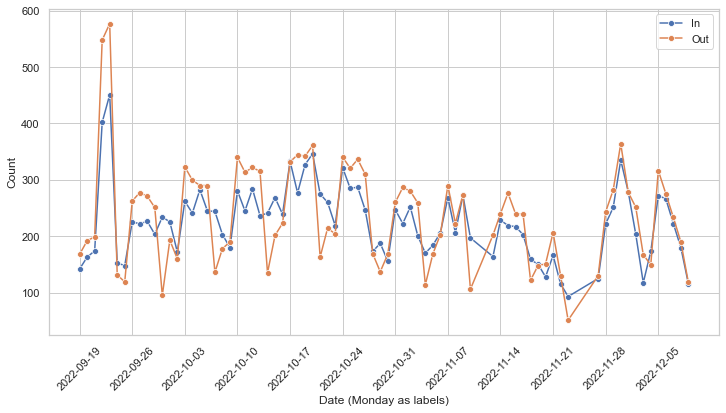

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Geisel_daily_fall_data, x='date', y='In', label='In', marker='o')
sns.lineplot(data=Geisel_daily_fall_data, x='date', y='Out', label='Out', marker='o')

week_range = pd.date_range('2022-09-19', '2022-12-10', freq='W-MON')

plt.xlabel('Date (Monday as labels)')
plt.ylabel('Count')
plt.xticks(week_range, rotation=45)
plt.show()

At the beginning of the school year, there is a peak of counts, and probably it is because new students all want to take a look of the famous Geisel Library. Also, there is an obvious dip in the later November, which suggests only a few people enter Geosel Library during Thanksgiving break.

##### Winter Quarter

In [32]:
Geisel_winter_df['date'] = Geisel_winter_df['datetime'].dt.date
Geisel_daily_winter_data = Geisel_winter_df.groupby('date').agg({'In': 'median', 'Out': 'median'}).reset_index()

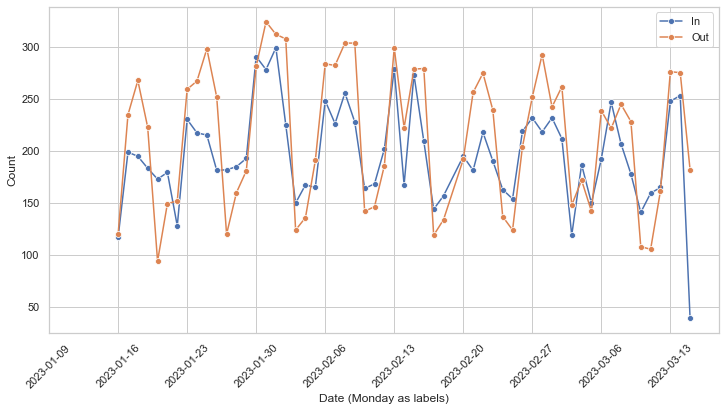

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Geisel_daily_winter_data, x='date', y='In', label='In', marker='o')
sns.lineplot(data=Geisel_daily_winter_data, x='date', y='Out', label='Out', marker='o')

week_range = pd.date_range('2023-01-04','2023-03-15', freq='W-MON')

plt.xlabel('Date (Monday as labels)')
plt.ylabel('Count')
plt.xticks(week_range, rotation=45)
plt.show()

The data from Winter quarter is very periodic. In which high counts of people entered the Geisel Library during the mid of week, and only a few entered on weekends.

##### Spring Quarter

In [34]:
Geisel_spring_df['date'] = Geisel_spring_df['datetime'].dt.date
Geisel_daily_spring_data = Geisel_spring_df.groupby('date').agg({'In': 'median', 'Out': 'median'}).reset_index()

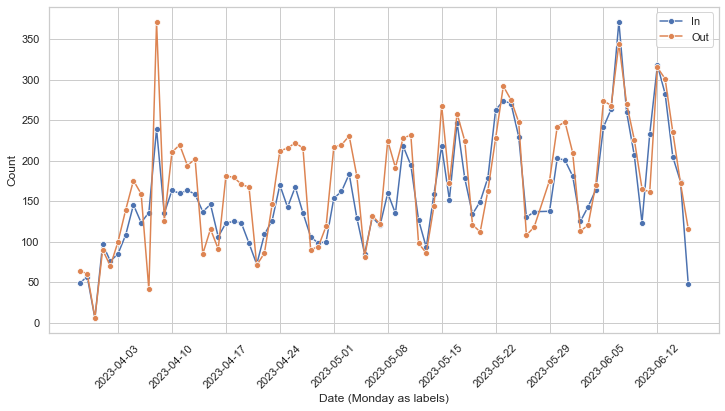

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Geisel_daily_spring_data, x='date', y='In', label='In', marker='o')
sns.lineplot(data=Geisel_daily_spring_data, x='date', y='Out', label='Out', marker='o')

week_range = pd.date_range('2023-03-29','2023-06-16', freq='W-MON')

plt.xlabel('Date (Monday as labels)')
plt.ylabel('Count')
plt.xticks(week_range, rotation=45)
plt.show()

Around 2023-04-10, there is sharp increase of people leaving the Geisel Library, but the number of people entering the Geisel Library is not compatible. So, we guess the machine is malfunctioal on that day. Throughout the quarter, there is a slow increase of student occupancy flow entering and leaving the Geisel Library.

### WongAvery Library EDA

We perform EDA on the WongAvery Library dataset and primarily examine distribution and number trends over time.

In [36]:
WongAvery_Merged_df.sort_values(by='In', ascending=False).head()

,datetime,In,Out,In_Out_Diff
986,2023-02-28 10:00:00,28406,29227,-821
1804,2023-05-24 09:00:00,6790,6323,467
1509,2023-04-17 17:00:00,204,29,175
988,2023-02-28 12:00:00,167,84,83
991,2023-02-28 15:00:00,165,130,35


In [37]:
WongAvery_Merged_df = WongAvery_Merged_df.drop([986, 1804]) #Drop outlier index

We dropped index `986`, `1804` because we identified these specific datapoints as outliers as it is highly unlikely that WongAvery Library had 28406 (for index `986`), 6790 (for index `1804`) people coming in. The data collected during these two specific datapoints also didn't correlate with the number trends shown during the time stamps immediately before and after the datapoint. We concluded these datapoints were generated as a result of system failure and decided to drop the two indexes as shown in the code above.

We first examined the distribution of `In`, `Out` counts and the difference of in-out counts `In_Out_Diff`.

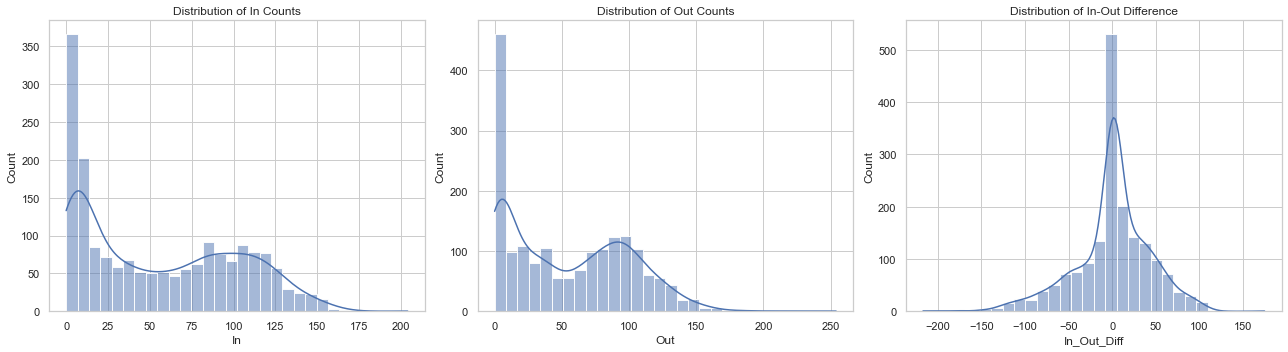

                In          Out  In_Out_Diff
count  1803.000000  1803.000000  1803.000000
mean     55.387133    54.675541     0.711592
std      46.375260    45.069469    44.025394
min       0.000000     0.000000  -217.000000
25%       9.000000     8.000000   -16.000000
50%      47.000000    49.000000     2.000000
75%      97.000000    92.000000    26.000000
max     204.000000   254.000000   175.000000


In [38]:
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Histogram for 'In'
sns.histplot(WongAvery_Merged_df['In'], bins = 30, ax = axes[0], kde = True)
axes[0].set_title('Distribution of In Counts')

# Histogram for 'Out'
sns.histplot(WongAvery_Merged_df['Out'], bins = 30, ax = axes[1], kde = True)
axes[1].set_title('Distribution of Out Counts')

# Histogram for 'In_Out_Diff'
sns.histplot(WongAvery_Merged_df['In_Out_Diff'], bins = 30, ax = axes[2], kde = True)
axes[2].set_title('Distribution of In-Out Difference')

plt.tight_layout()
plt.show()

# Descriptive Statistics
descriptive_stats = WongAvery_Merged_df[['In', 'Out', 'In_Out_Diff']].describe()
print(descriptive_stats)

In [39]:
WongAvery_Merged_EDA_df = WongAvery_Merged_df.copy()
WongAvery_Merged_EDA_df['hour'] = WongAvery_Merged_EDA_df['datetime'].dt.hour
WongAvery_Merged_EDA_df['date'] = WongAvery_Merged_EDA_df['datetime'].dt.date
WongAvery_Merged_EDA_df['month'] = WongAvery_Merged_EDA_df['datetime'].dt.month
WongAvery_Merged_EDA_df['weekday'] = WongAvery_Merged_EDA_df['datetime'].dt.weekday
WongAvery_Merged_EDA_df['quarter'] = WongAvery_Merged_EDA_df['datetime'].apply(lambda x: assign_quarter(x))

#### Hourly Trend Analysis

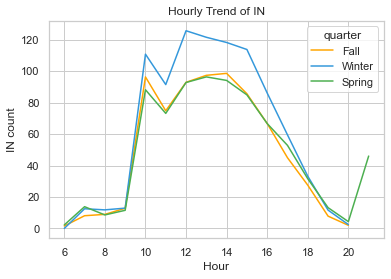

In [40]:
sns.lineplot(data=WongAvery_Merged_EDA_df,
             x='hour', 
             y='In', 
             hue='quarter',
             errorbar=None,
             palette=['#FFA500','#3498db','#4CAF50'])
plt.title('Hourly Trend of IN')
plt.xlabel('Hour')
plt.ylabel('IN count')
plt.show()

The sharp increase is expected because Wong Avery Library usually opens at 9 AM.

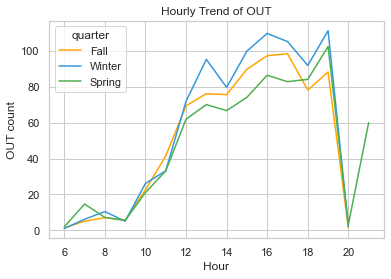

In [41]:
sns.lineplot(data=WongAvery_Merged_EDA_df, 
             x='hour', 
             y='Out', 
             hue='quarter',              
             errorbar=None,
             palette=['#FFA500','#3498db','#4CAF50'])
plt.title('Hourly Trend of OUT')
plt.xlabel('Hour')
plt.ylabel('OUT count')
plt.show()

The sharp decrease is expected as Wong Avery Library usually closes at 8 PM.

#### Annual Data Analysis

We merged The hourly data to daily data for annual analysis. 

In [42]:
date_df = WongAvery_Merged_EDA_df.groupby('date')[['In', 'Out','weekday']].median().reset_index()
date_df['quarter'] = date_df['date'].apply(lambda x: assign_quarter(x))

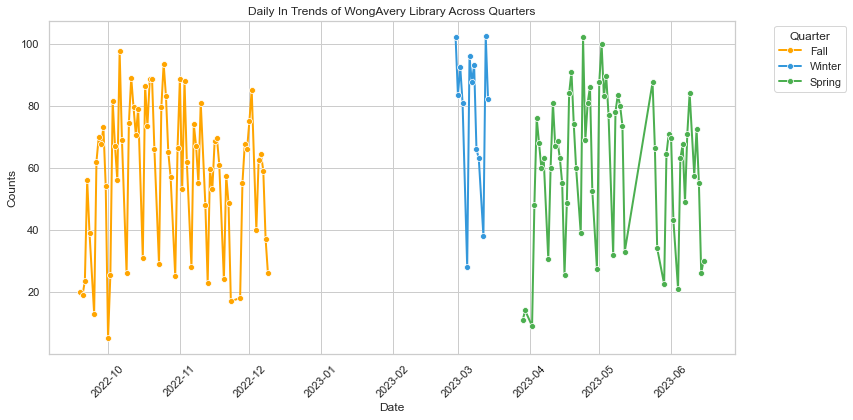

In [43]:
sns.set(style="whitegrid")

# Create the line plot with dots
plt.figure(figsize=(12, 6))
sns.lineplot(data=date_df, 
             x='date', 
             y='In', 
             hue='quarter', 
             markers=True, 
             marker='o', 
             markersize=6, 
             linestyle='-', 
             linewidth=2,
             palette=['#FFA500','#3498db','#4CAF50'])

# Customize plot details
plt.title('Daily In Trends of WongAvery Library Across Quarters')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

It is certain that Wong Avery Library is has severe missing data during winter quarter.

The dips in this graph are weekend dates. Maybe it is to the fact that Wong Avery library is **closed** on Saturdays. We will remove `Saturday` dates from this point of calculation.

In [44]:
date_df = date_df[(date_df['weekday'] != 5)]
WongAvery_Merged_EDA_df = WongAvery_Merged_EDA_df[(WongAvery_Merged_EDA_df['weekday'] != 5)]

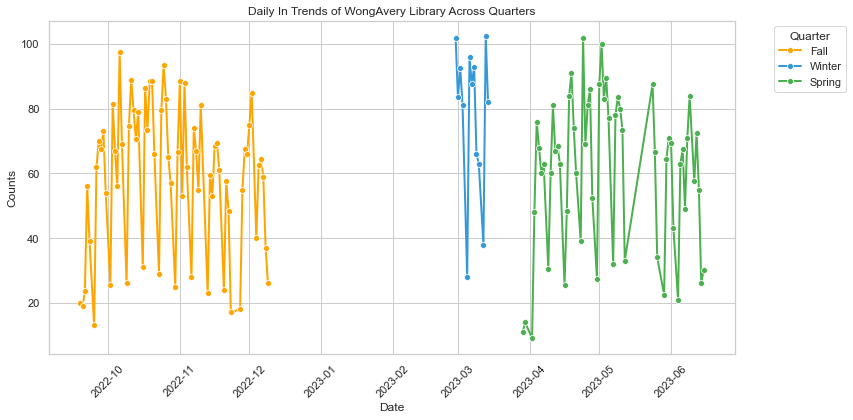

In [45]:
sns.set(style="whitegrid")

# Create the line plot with dots
plt.figure(figsize=(12, 6))
sns.lineplot(data=date_df, 
             x='date', 
             y='In', 
             hue='quarter', 
             markers=True, 
             marker='o', 
             markersize=6, 
             linestyle='-', 
             linewidth=2,
             palette=['#FFA500','#3498db','#4CAF50'])

# Customize plot details
plt.title('Daily In Trends of WongAvery Library Across Quarters')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Not that much changed, one reason is that there's only 3 Saturdays recorded through out the entire academic year, and people just don't come that often to this library during Sundays.

#### Quarter Data Analysis

In [46]:
fall_df = WongAvery_Merged_EDA_df[WongAvery_Merged_EDA_df['quarter'] == 'Fall'].copy()
winter_df = WongAvery_Merged_EDA_df[WongAvery_Merged_EDA_df['quarter'] == 'Winter'].copy()
spring_df = WongAvery_Merged_EDA_df[WongAvery_Merged_EDA_df['quarter'] == 'Spring'].copy()

##### Fall Quarter

In [47]:
fall_df['date'] = fall_df['datetime'].dt.date
daily_fall_data = fall_df.groupby('date').agg({'In': 'median', 'Out': 'median'}).reset_index()

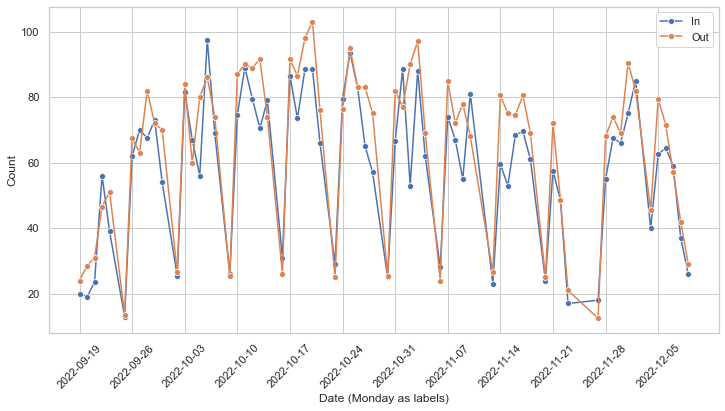

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_fall_data, x='date', y='In', label='In', marker='o')
sns.lineplot(data=daily_fall_data, x='date', y='Out', label='Out', marker='o')

week_range = pd.date_range('2022-09-19', '2022-12-10', freq='W-MON')

plt.xlabel('Date (Monday as labels)')
plt.ylabel('Count')
plt.xticks(week_range, rotation=45)
plt.show()

For Sundays, usually around 30 people come in to Wong Avery library (maybe the same people LOL). And the dip around end of November is Thanksgiving holiday.

##### Winter Quarter

In [49]:
winter_df['date'] = winter_df['datetime'].dt.date
daily_winter_data = winter_df.groupby('date').agg({'In': 'median', 'Out': 'median'}).reset_index()

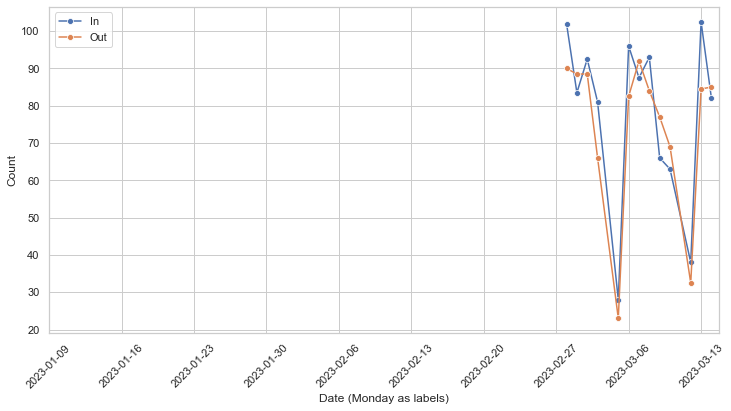

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_winter_data, x='date', y='In', label='In', marker='o')
sns.lineplot(data=daily_winter_data, x='date', y='Out', label='Out', marker='o')

week_range = pd.date_range('2023-01-04','2023-03-15', freq='W-MON')

plt.xlabel('Date (Monday as labels)')
plt.ylabel('Count')
plt.xticks(week_range, rotation=45)
plt.show()

As mentioned before, Winter quarter has too many missing data. We will probably discard this quarters data for Wong Avery.

##### Spring Quarter

In [51]:
spring_df['date'] = spring_df['datetime'].dt.date
daily_spring_data = spring_df.groupby('date').agg({'In': 'median', 'Out': 'median'})

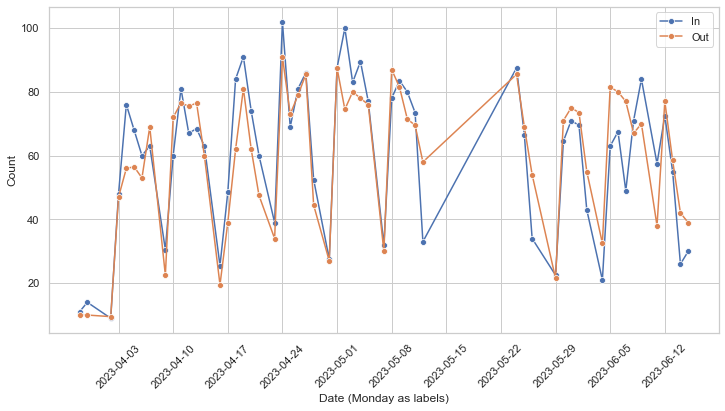

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_spring_data, x='date', y='In', label='In', marker='o')
sns.lineplot(data=daily_spring_data, x='date', y='Out', label='Out', marker='o')

week_range = pd.date_range('2023-03-29','2023-06-16', freq='W-MON')

plt.xlabel('Date (Monday as labels)')
plt.ylabel('Count')
plt.xticks(week_range, rotation=45)
plt.show()

As shown above, there's a jump from around May 15th to 25th. Can't find why, maybe its also due to machine failure.

### Weather EDA

EDA on the Weather data set to examine weather changes across time including temperature and wind conditions. 

Assign quarters

In [53]:
weather_df['Quarter'] = weather_df['datetime'].apply(lambda x: assign_quarter(x))

In [54]:
start_date = pd.to_datetime('2022-09-19')
end_date = pd.to_datetime('2023-06-16')
weather_df = weather_df[(weather_df['datetime'] >= start_date) & (weather_df['datetime'] <= end_date)]

##### Wind EDA

In [55]:
wind_df = weather_df[weather_df['Wind_Speed'] <= 998]
wind_df = weather_df[weather_df['Wind_Degree'] <= 998]

Daily wind speed

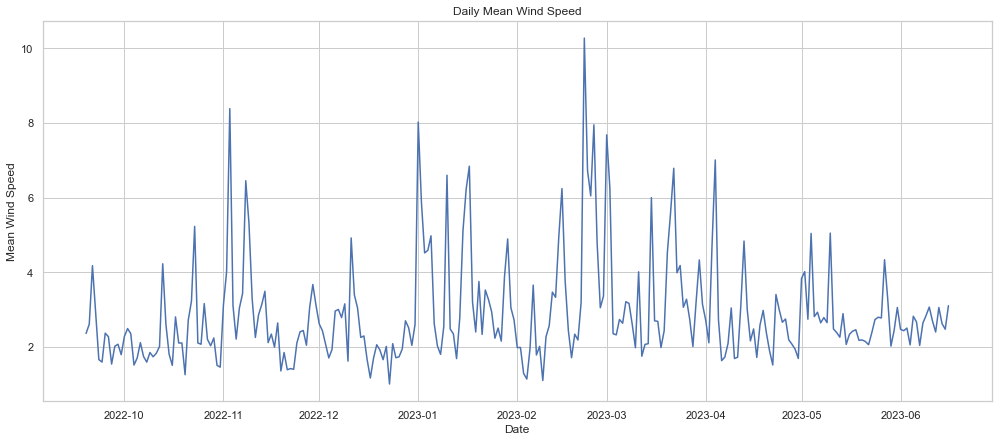

In [56]:
daily_mean_wind_speed = wind_df.groupby(wind_df["datetime"].dt.date)["Wind_Speed"].mean()
plt.figure(figsize=(17, 7))
plt.plot(daily_mean_wind_speed)
plt.title('Daily Mean Wind Speed')
plt.xlabel('Date')
plt.ylabel('Mean Wind Speed')
plt.show()

Quarterly wind speed

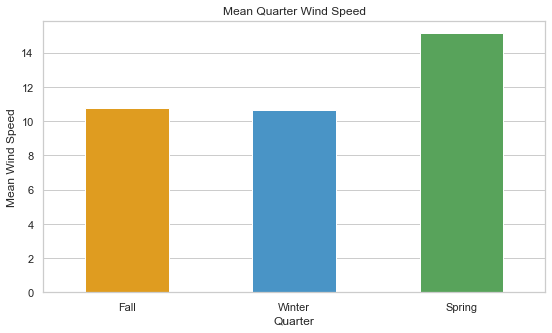

In [57]:
quarterly_mean_wind_speed = weather_df.groupby('Quarter')['Wind_Speed'].mean()

plt.figure(figsize=(9, 5))

# Plot using Seaborn barplot
sns.barplot(x=quarterly_mean_wind_speed.index,
            hue =  quarterly_mean_wind_speed.index,
            y=quarterly_mean_wind_speed,
            order=['Fall','Winter','Spring'],
            palette=['#FFA500', '#4CAF50', '#3498db'],
            width=0.5)

# Set titles and labels
plt.title('Mean Quarter Wind Speed')
plt.xlabel('Quarter')
plt.ylabel('Mean Wind Speed')

# Rotate x-axis labels
plt.xticks(rotation=0)
plt.show()

##### Temperature EDA

Daily temperature trend

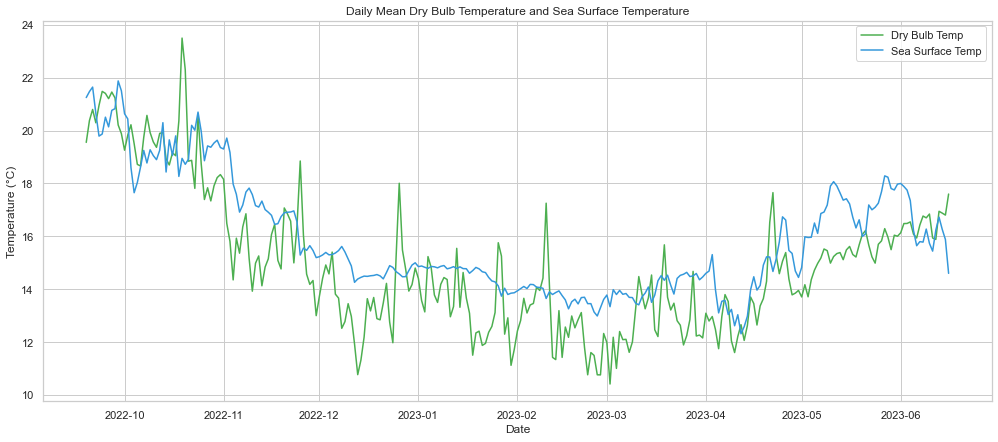

In [58]:
daily_mean_dry_bulb = weather_df.groupby(weather_df["datetime"].dt.date)["Dry_Bulb_Temp"].mean()
daily_mean_sea_surface = weather_df.groupby(weather_df["datetime"].dt.date)["Sea_Surface_Temp"].mean()

sns.set(style="whitegrid")

plt.figure(figsize=(17, 7))

# Plot using Seaborn lineplot
sns.lineplot(x=daily_mean_dry_bulb.index, y=daily_mean_dry_bulb, label='Dry Bulb Temp', color='#4CAF50')
sns.lineplot(x=daily_mean_sea_surface.index, y=daily_mean_sea_surface, label='Sea Surface Temp', color='#3498db')

plt.title('Daily Mean Dry Bulb Temperature and Sea Surface Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

Quarterly Mean Temperature

In [59]:
quarterly_mean_temp = weather_df.groupby('Quarter')[['Dry_Bulb_Temp','Sea_Surface_Temp']].mean()
quarterly_mean_temp = quarterly_mean_temp.reset_index().melt(id_vars='Quarter', var_name='Temperature', value_name='Value')


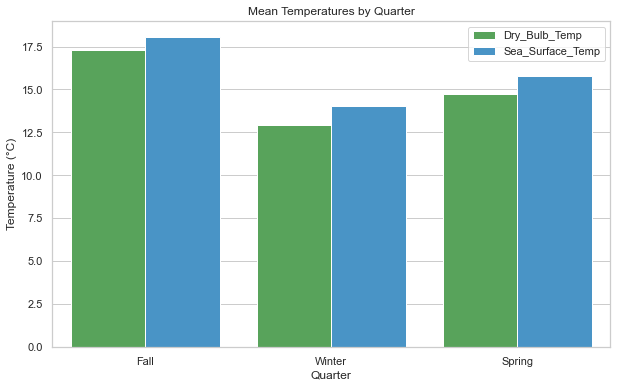

In [60]:
plt.figure(figsize=(10, 6))


sns.barplot(data = quarterly_mean_temp,
            x='Quarter', 
            y='Value', 
            hue='Temperature',  
            palette=['#4CAF50', '#3498db'],
            order=['Fall','Winter','Spring'],
            width=0.8)

plt.title('Mean Temperatures by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Temperature (°C)')

plt.legend()
plt.show()

### Geisel and Weather Relationship

In [71]:
Geisel_Merged_df.head()

,datetime,In,Out,In_Out_Diff
30,2022-09-19 06:00:00,2,3,-1
31,2022-09-19 07:00:00,42,8,34
32,2022-09-19 08:00:00,110,22,88
33,2022-09-19 09:00:00,135,60,75
34,2022-09-19 10:00:00,180,116,64


In [72]:
weather_df['Wind_Degree'] = weather_df['Wind_Degree'].replace(999.0, np.nan)
weather_df['Wind_Speed'] = weather_df['Wind_Speed'].replace(999.9, np.nan)
weather_df.head()

,datetime,Dry_Bulb_Temp,Sea_Surface_Temp,Wind_Degree,Wind_Speed,Wind_Direction,Quarter
6192,2022-09-19 00:00:00,20.2,21.9,290.0,3.1,West,Fall
6193,2022-09-19 01:00:00,20.3,21.9,NaN,NaN,NaN,Fall
6194,2022-09-19 02:00:00,19.5,21.9,300.0,1.5,West,Fall
6195,2022-09-19 03:00:00,19.5,21.6,320.0,1.5,North,Fall
6196,2022-09-19 04:00:00,19.5,21.5,320.0,1.5,North,Fall


In [93]:
merged_df = pd.merge(Geisel_Merged_df, weather_df, on='datetime', how='left')
merged_df[merged_df.isnull().any(axis=1)]

,datetime,In,Out,In_Out_Diff,Dry_Bulb_Temp,Sea_Surface_Temp,Wind_Degree,Wind_Speed,Wind_Direction,Quarter
21,2022-09-20 12:00:00,340,334,6,18.9,20.4,NaN,0.0,NaN,Fall
23,2022-09-20 14:00:00,289,282,7,19.2,21.5,NaN,0.0,NaN,Fall
50,2022-09-22 11:00:00,830,689,141,18.5,20.6,NaN,0.0,NaN,Fall
52,2022-09-22 13:00:00,1027,982,45,17.6,19.4,NaN,0.0,NaN,Fall
63,2022-09-23 06:00:00,11,4,7,20.3,19.5,NaN,0.0,NaN,Fall
...,...,...,...,...,...,...,...,...,...,...
4215,2023-06-15 02:00:00,23,105,-82,16.8,NaN,310.0,4.6,West,Spring
4217,2023-06-15 04:00:00,18,51,-33,16.7,16.3,NaN,NaN,NaN,Spring
4219,2023-06-15 06:00:00,29,24,5,16.7,16.7,NaN,0.0,NaN,Spring
4226,2023-06-15 13:00:00,440,333,107,NaN,NaN,NaN,NaN,NaN,NaN


Since we observed that Geisel is significantly less populated during weekends, we will drop weekend dates for better correlations.

In [94]:
merged_df = merged_df[(merged_df['datetime'].dt.weekday < 5)]
merged_df = merged_df[(merged_df['datetime'].dt.hour >= 7) & (merged_df['datetime'].dt.hour <= 22)]

In [95]:
# Extract date without time
merged_df['date'] = merged_df['datetime'].dt.date

# Columns to take the median for
median_columns = ['In', 'Out', 'In_Out_Diff', 'Dry_Bulb_Temp', 'Sea_Surface_Temp', 'Wind_Degree', 'Wind_Speed']

# Columns to keep as is
keep_columns = ['Quarter']

# Group by date and calculate the median for specified columns
daily_df = merged_df.groupby('date').agg({**{col: 'median' for col in median_columns}, **{col: 'first' for col in keep_columns}}).reset_index()

# Drop 'Wind_Direction' as requested
daily_df = daily_df.drop('Wind_Degree', axis=1)

In [96]:
daily_df

,date,In,Out,In_Out_Diff,Dry_Bulb_Temp,Sea_Surface_Temp,Wind_Speed,Quarter
0,2022-09-19,161.0,201.5,23.0,18.80,21.05,2.60,Fall
1,2022-09-20,185.0,211.5,6.5,19.95,21.30,1.50,Fall
2,2022-09-21,177.5,222.5,5.0,20.50,21.50,4.35,Fall
3,2022-09-22,495.0,580.0,-33.5,19.90,20.25,2.10,Fall
4,2022-09-23,555.5,691.5,1.5,20.05,19.30,0.50,Fall
...,...,...,...,...,...,...,...,...
151,2023-06-09,352.0,355.5,44.5,16.40,16.60,1.80,Spring
152,2023-06-12,472.0,470.0,5.5,15.80,16.25,1.50,Spring
153,2023-06-13,422.0,409.5,-18.0,16.70,17.00,3.10,Spring
154,2023-06-14,343.0,346.5,-27.5,16.75,16.60,1.00,Spring


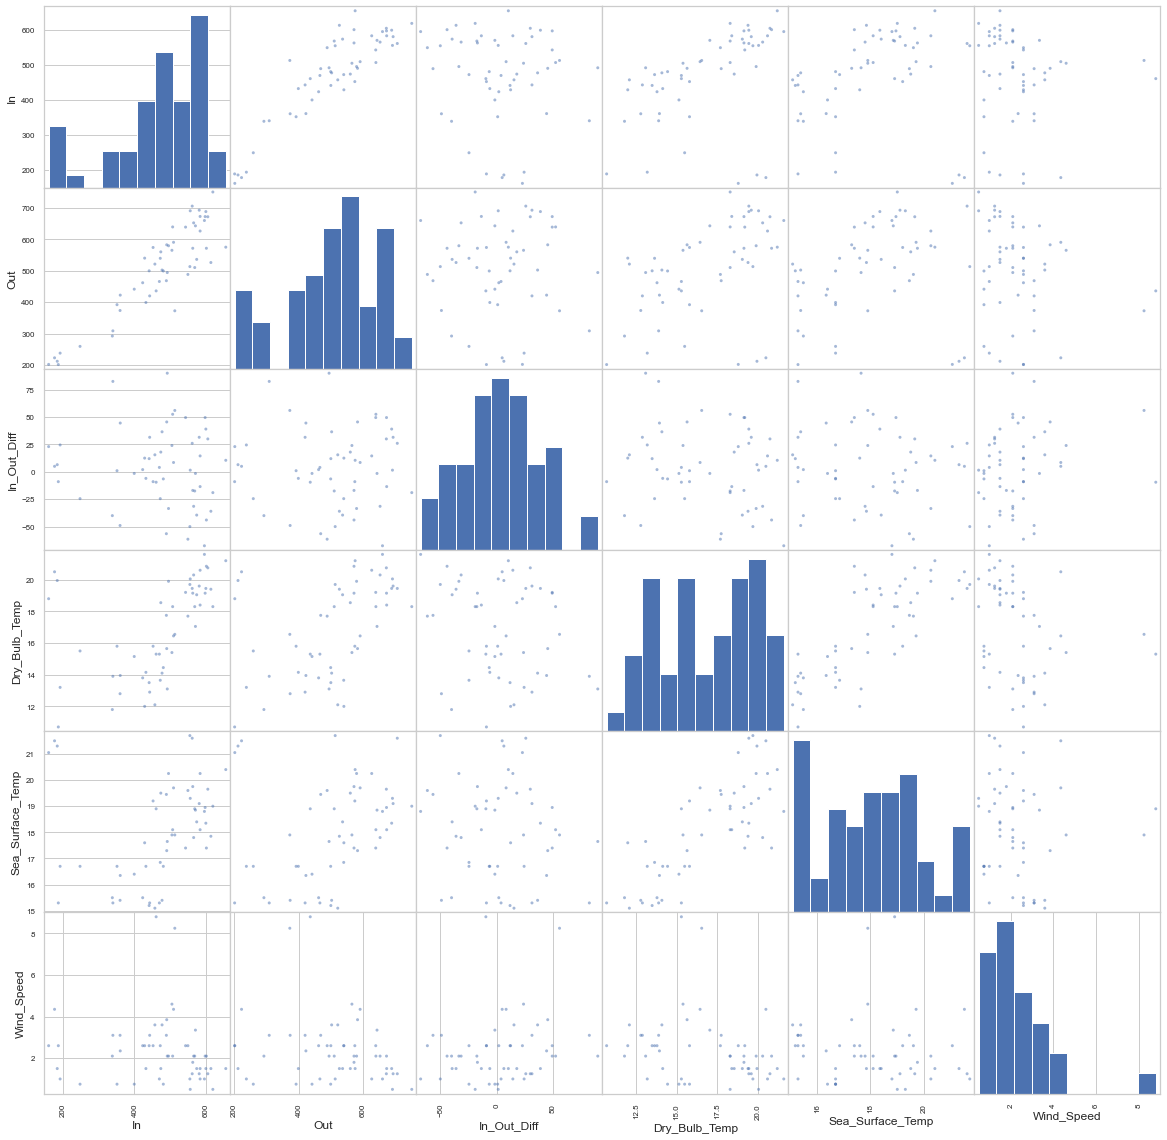

In [99]:
merged_fall_df = daily_df[(daily_df['Quarter'] == 'Fall')]
fig = pd.plotting.scatter_matrix(frame=merged_fall_df[['date', 'In', 'Out', 'In_Out_Diff', 'Dry_Bulb_Temp',
       'Sea_Surface_Temp', 'Wind_Speed']],
       figsize=(20,20))

## EDA Conclusions

Our topic about the coloration between weather conditions and the library attendance will be backed by our exploratory data analysis. Our EDA was performed on three data sets, Gate count data from the Geisel library, Gate count data from WongAvery Library, and La Jolla weather data.

At the start of the EDA, we eliminated the outliers of the dataset. For the two library gate count datasets, our EDA focused on hour trend analysis, annual data analysis and quarter data analysis. For the La Jolla weather dataset, we focused on the analysis of the trend of windspeed relate to date, average wind speed in a quarter, and temperature trend over time of the school year and mean temperature over a quarter.

For the WongAvery dataset, we have been notified that the Wong Avery library experienced a severe machine failure during the winter quarter, which means the dataset missed almost 6 weeks of data, drives our team to focuses more on the comparison between the Geisel Library data and La Jolla weather data, to ensure better accuracy in our findings.

Hourly trend analysis demonstrates the trend of the number of people that are coming into the library and going out of the library. Our analysis indicates that the number of people is coming into the library starts to rise at 7:30, peaked at around 12am and decrease around 15:00 pm. We observed continuous high attendance count in fall quarter, and low attendance count in spring quarter with winter quarter in the middle.

Our annual data analysis demonstrates similar results, with the fall quarter that has the highest attendance count spring quarter has the lowest and the winter quarter in the middle. We also observed that there are two peaks in the attendance count curve for each quarter, the first peak being around week 3-4 and the second peak being around week 9-10. We assume that the curve is because of the midterm and final schedules.

Our quarterly analysis indicates a periodic wavey trend, demonstrating the enter and out count peaked at the middle of a week and falls as it approaches the weekends. We assume This is because people generally study during the weekdays and are able to enjoy their time off campus (hopefully) during the weekends.

The weather data indicates a significantly high windspeed mean in the spring quarter with fall windspeed mean slightly higher than winter. We also observed that temperature mean is the lowest in the winter and slightly higher in the spring and significantly higher in the winter. The trend of the temperature mean starts to drop from October and reaches its bottom in February and start to rise since.

The next step for us is to combine the two data sets to compare and contrast so we could find correlation between weather conditions (windspeed, temperature) and students attendance in the library.


# Ethics & Privacy


- Informed consent

    I think that the data our team collected both the weather data and the traffic accident data from a trusted pubblic website,the official San Diego government website.
- Collection bias.

    The weather and traffic accident data are all observed events, and the data collected is more focued on the facts that happened instead of subjective observation. The factual focused data could help us reduce collection bias.
- Limit PII exposure

    Our data, though collected from various person and events, do not contain much personally identifiable information, there are no obvious part in our data that can lead to identification of certain indivisual.
- Downstream bias mitigation

    The data we are using are collected comprehensively thoughout all the traffic accidents rigardless of their race, gender or religious backgrounds.
-  Data security

    Since the data are public accessible, our job of keeping our own data safe is to make our repo private and only grant access to relative indivisuals.
- Right to be forgotten

    We'll open a contact portal to the public so that if anyone feels they wish to have their data removed, they have the freedom to do so.
- Data retention plan

    We plan on delete the data we've collected after week 10
- Missing perspectives

    We plan on talking to the TA and possibly the professor about our assumption to collect another point of view.
- Dataset bias

    The dataset is collected by the San Diego government through factual events e.g. weather, temperature, the number and the type of traffic accidents that happened. In conclusion, I think our dataset is mostly bias free, but we can't rule out the bias created by the observer of the event. e.g police officer's view on an accident,
- Honest representation

    we will try our best in representing the data without any bias
- Privacy in analysis

    We will insure that data with PII are not used or displayed unless necessary for the analysis
- Auditability

    We will insure that any analysis we conclude will be reasonable and reproducible

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* **Team Expectation 1: Communication**
  * We will use the designated Discord chat for project-related communication and be responsive to the best of our abilities to ensure that every group member is on the same page.
  * We understand that members might be unable to attend certain meetings due to other responsibilities. If that happens, they should notify the rest of the group before the scheduled meeting.
  
* **Team Expectation 2: Scheduled Meetings**
  * All group members are expected to attend the scheduled meeting in the Project Timeline.
  * Other meetings not on the timeline can also be scheduled if necessary.
* **Team Expectation 3: Team Contribution**
  * Although project sections will be divided based on individual strengths, everyone should contribute to some degree.
* **Team Expectation 4: Quality Assurance**
  * All major project sections should be reviewed before submission.
* **Team Expectation 5: Uncooperative Group Member**
  * In the case that a group member refuses to complete their assigned task, the rest of the group will notify them of that and give them a time frame to improve and show change.
  * If there is no change shown, the professor will have to be notified.
* **Team Expectation 6: Accountability**
  * All members are expected to equally contribute to the project by completing their assigned responsibilities. 
  * If any member is facing difficulty completing their portion, they should bring it up to the team to receive help.


# Project Timeline Proposal



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/23  |  7:30 PM | Determine method of communication and weekly meeting time going forward  | Discuss and decide on research topic; research databases for ideal datasets; begin general background research | 
| 10/30  |  8 PM |  Each member provide one dataset for topic; continue with general background research | Discuss project proposal; draft project proposal; complete responsible section | 
| 11/6  | 8 PM  | Finalize and submit proposal; receieve feedback and continue to edit proposal accordingly  | Discuss data wrangling and cleaning for dataset |
| 11/15  | 8 PM  | Import & Wrangle Data (`La Jolla 2022/3.csv`, `Gate Counters.csv`) | Update hypothesis, copy sections from proposal to checkpoint |
| 11/20  | 8 PM  | Finalize wrangling of both datasets; Begin Analysis, Add visualizations | Discuss/edit Analysis; Add.remove data visualization; Discuss ethics and privacy |
| 11/27  | 8 PM  | Complete analysis; Finalize visualizations; Receive feedback | Discuss/edit full project and improvement ideas based off feedback received; Start working on project video demonstration |
| 12/13  | Before 11:59 PM | Finalize project; Finalize project video | Turn in Final Project components & Group Project Surveys |